In [2]:
!pip install seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)


In [3]:
### Step 1: Import Required Libraries
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import cv2

In [4]:
### Step 2: Define and Compile the Model
# Create a simple CNN model for emotion detection
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  # Assuming 7 classes for FER 2013
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Display model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 128)         0

In [5]:

### Step 3: Prepare the Data
# Use ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Load the FER 2013 dataset
train_generator = train_datagen.flow_from_directory(
    r"C:\Users\JOHN\OneDrive\Desktop\Visualization_Activation_Maps\dataset\train",
    target_size=(48, 48),
    batch_size=64,
    color_mode='grayscale',
    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    r"C:\Users\JOHN\OneDrive\Desktop\Visualization_Activation_Maps\dataset\test",
    target_size=(48, 48),
    batch_size=64,
    color_mode='grayscale',
    class_mode='categorical')



Found 28709 images belonging to 7 classes.
Found 7179 images belonging to 7 classes.


In [6]:
### Step 4: Train the Model
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=25)

Epoch 1/25
448/448 [==============================] - 545s 1s/step - loss: 1.8182 - accuracy: 0.2437 - val_loss: 1.7786 - val_accuracy: 0.2600
Epoch 2/25
448/448 [==============================] - 66s 148ms/step - loss: 1.7880 - accuracy: 0.2509 - val_loss: 1.7424 - val_accuracy: 0.2605
Epoch 3/25
448/448 [==============================] - 79s 177ms/step - loss: 1.7616 - accuracy: 0.2689 - val_loss: 1.6924 - val_accuracy: 0.3057
Epoch 4/25
448/448 [==============================] - 99s 221ms/step - loss: 1.7404 - accuracy: 0.2834 - val_loss: 1.6305 - val_accuracy: 0.3383
Epoch 5/25
448/448 [==============================] - 104s 233ms/step - loss: 1.6913 - accuracy: 0.3140 - val_loss: 1.5520 - val_accuracy: 0.4076
Epoch 6/25
448/448 [==============================] - 102s 227ms/step - loss: 1.6371 - accuracy: 0.3481 - val_loss: 1.4833 - val_accuracy: 0.4424
Epoch 7/25
448/448 [==============================] - 102s 227ms/step - loss: 1.5939 - accuracy: 0.3690 - val_loss: 1.4271 - val_a

In [7]:
### Step 5: Evaluate the Model
# Evaluate on validation data
val_generator.reset()
y_pred = model.predict(val_generator, steps=val_generator.samples // val_generator.batch_size + 1)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = val_generator.classes

113/113 [==============================] - 11s 91ms/step


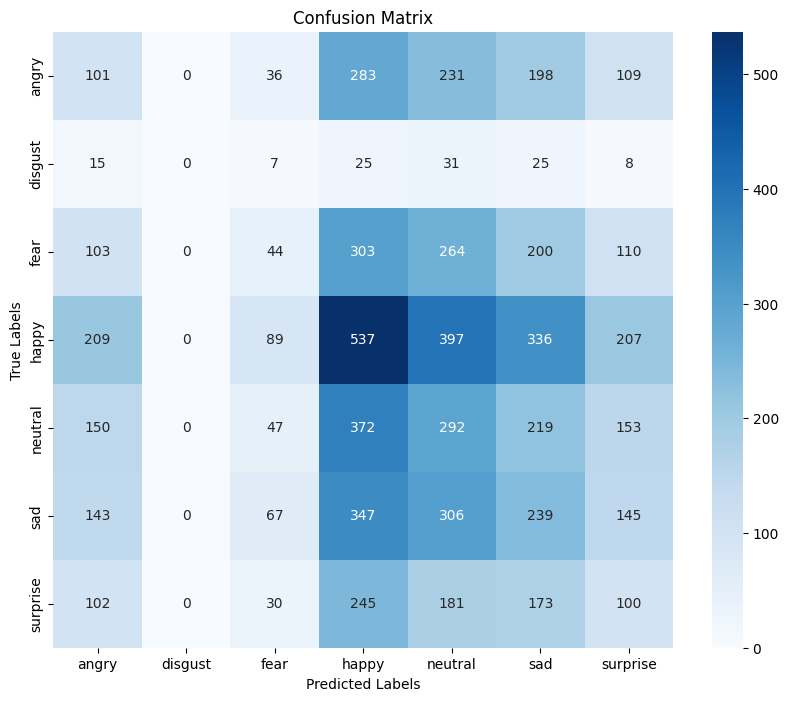

In [8]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=val_generator.class_indices.keys(), yticklabels=val_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [9]:
# Classification Report
print("Classification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=val_generator.class_indices.keys()))


Classification Report:

              precision    recall  f1-score   support

       angry       0.12      0.11      0.11       958
     disgust       0.00      0.00      0.00       111
        fear       0.14      0.04      0.07      1024
       happy       0.25      0.30      0.28      1775
     neutral       0.17      0.24      0.20      1233
         sad       0.17      0.19      0.18      1247
    surprise       0.12      0.12      0.12       831

    accuracy                           0.18      7179
   macro avg       0.14      0.14      0.14      7179
weighted avg       0.17      0.18      0.17      7179



C:\Users\JOHN\anaconda3\envs\activation_maps\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\JOHN\anaconda3\envs\activation_maps\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\JOHN\anaconda3\envs\activation_maps\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [10]:
### Step 6: Save the Model
# Save the model architecture and weights
model_json = model.to_json()
with open('new_model.json', 'w') as json_file:
    json_file.write(model_json)

model.save_weights('new_model_weights.h5')
print("Model and weights saved.")

Model and weights saved.


In [11]:
### Step 7: Visualize Activation Maps
# Function to preprocess the input image
def preprocess_image(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (48, 48))
    img = img / 255.0
    img = np.expand_dims(img, axis=-1)
    img = np.expand_dims(img, axis=0)
    return img

In [12]:
# Function to generate Grad-CAM heatmap
def get_grad_cam(model, img_array, layer_name):
    grad_model = tf.keras.models.Model(
        inputs=model.inputs, 
        outputs=[model.get_layer(layer_name).output, model.output])
    
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, np.argmax(predictions[0])]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [13]:
# Path to a sample image
img_path = r"C:\Users\JOHN\OneDrive\Desktop\Visualization_Activation_Maps\dataset\test\happy\PrivateTest_2764941.jpg"
input_image = preprocess_image(img_path)


In [14]:
# Specify a convolutional layer
layer_name = 'conv2d_2'  # Adjust based on your model
heatmap = get_grad_cam(model, input_image, layer_name)


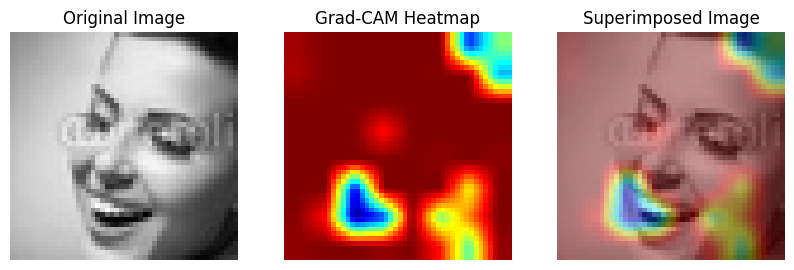

In [15]:
# Visualize the heatmap
original_img = cv2.imread(img_path)
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
original_img = cv2.resize(original_img, (48, 48))

heatmap = cv2.resize(heatmap, (original_img.shape[1], original_img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap_color = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(original_img, 0.6, heatmap_color, 0.4, 0)

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(original_img)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Grad-CAM Heatmap')
plt.imshow(heatmap_color)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Superimposed Image')
plt.imshow(superimposed_img)
plt.axis('off')

plt.show()


In [16]:
# Save the results
cv2.imwrite('heatmap.jpg', heatmap_color)
cv2.imwrite('superimposed_image.jpg', cv2.cvtColor(superimposed_img, cv2.COLOR_RGB2BGR))

True